In [1]:
import os
os.chdir('..')

In [2]:
import numpy as np
import scipy as sp
import datajoint as dj

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import signal

from pipeline import lab, experiment, ephys, histology, ccf
from pipeline.plot import histology_plot

Connecting root@127.0.0.1:3306


In [4]:
experiment.Session & ephys.Unit

subject_id institution 6 digit animal ID,session session number,session_date,username,rig
435884,1,2018-12-07,daveliu,RRig


In [5]:
session_keys = experiment.Session.fetch('KEY')

In [6]:
session_key = session_keys[0]

# 3D plot of brain surface and probe tracks

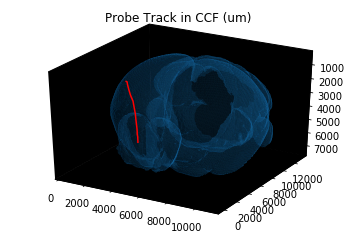

In [58]:
histology_plot.plot_probe_tracks(session_key)

# Better interactive 3D plot - requires k3d

In [7]:
import k3d

In [8]:
um_per_px = 20
# fetch mesh
vertices, faces = (ccf.AnnotatedBrainSurface
                   & 'annotated_brain_name = "Annotation_new_10_ds222_16bit_isosurf"').fetch1(
    'vertices', 'faces')
vertices = vertices * um_per_px

In [59]:
probe_tracks = {}
for probe_insert in (ephys.ProbeInsertion & session_key).fetch('KEY'):
    x, z, y = (histology.LabeledProbeTrack.Point & probe_insert).fetch(
        'ccf_x', 'ccf_y', 'ccf_z', order_by='"order"')
    probe_tracks[probe_insert['insertion_number']] = np.vstack(zip(*(x, y, z)))

In [60]:
plot = k3d.plot(background_color = 1, grid_visible = False, height=400)

In [61]:
mesh = k3d.mesh(vertices, faces, opacity=0.25, color=16777215)

C:\ProgramData\Anaconda3\lib\site-packages\traittypes\traittypes.py:101: UserWarning: Given trait value dtype "float64" does not match required type "float32". A coerced copy has been created.
  np.dtype(self.dtype).name))
C:\ProgramData\Anaconda3\lib\site-packages\traittypes\traittypes.py:101: UserWarning: Given trait value dtype "int32" does not match required type "uint32". A coerced copy has been created.
  np.dtype(self.dtype).name))


In [62]:
colors = [16711684, 65284, 15662848, 3932415]  # r, g, y, b
for (k, v), c in zip(probe_tracks.items(), colors):
    plot += k3d.line(v, color=c, width=0.25)

C:\ProgramData\Anaconda3\lib\site-packages\traittypes\traittypes.py:101: UserWarning: Given trait value dtype "float64" does not match required type "float32". A coerced copy has been created.
  np.dtype(self.dtype).name))


In [63]:
plot += mesh

In [64]:
plot.display()

Output()